## 이미지 불러오기

In [40]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def imshow(tit, image):
    if len(image.shape) == 3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap='gray')
    plt.title(tit)
    plt.axis('off')    
    plt.show()

In [3]:
DIR = './src/'

In [4]:
img = cv2.imread(DIR+'lenna.bmp')

if img is None:
    print('Image load failed!')

In [5]:
print(img.shape)

(512, 512, 3)


## 색 다루기

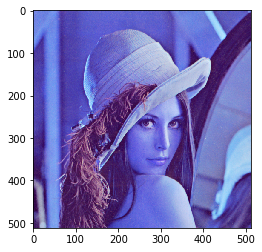

In [6]:
# opencv는 BGR 채널을 사용함
plt.imshow(img)

In [7]:
B = img[:,:,0]
G = img[:,:,1]
R = img[:,:,2]

print(B.shape)

(512, 512)


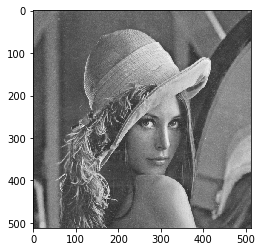

In [8]:
plt.imshow(B, cmap='gray') #파란색인데 밝은 부분은 밝게 나옴

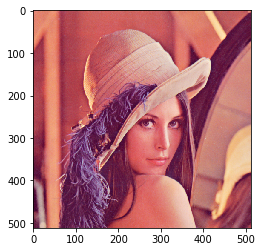

In [9]:
RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB)

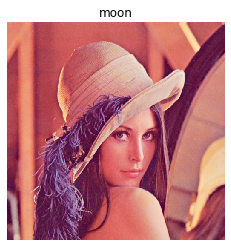

In [10]:
imshow('moon', img)

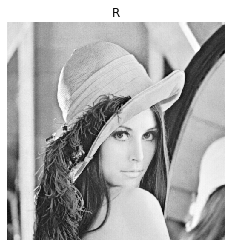

In [11]:
imshow("R", R) # 빨간색에 대한 밝기

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


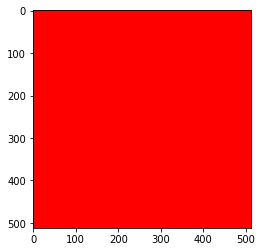

In [12]:
RR = np.zeros(img.shape) # 실수 타입
RR[:,:,0] = R   # 0~255 실수 
plt.imshow(RR)  # int -> 0~255   실수 -> 0~1 로 정규화 되어 있다고 받아들임. 1보다 큰 값은 전부 255로 해석함

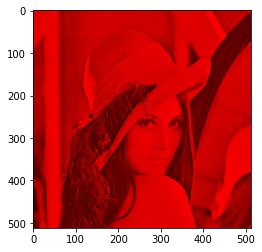

In [13]:
RR = np.zeros(img.shape) # 실수 타입
RR[:,:,0] = R/255
plt.imshow(RR)  

In [14]:
%%writefile image2.py

import cv2
import numpy as np

img = cv2.imread(DIR+'lenna.bmp')

R = img[:,:,2]

RR = np.zeros(img.shape) # 실수 타입
RR[:,:,2] = R/255.0

cv2.imshow('src',img)
cv2.imshow('dest',RR)

cv2.waitKey()
cv2.destroyAllWindows()


Overwriting image2.py


In [15]:
import subprocess as sp
server = sp.Popen("python image2.py", shell = True)

## 색변환

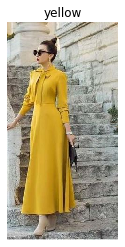

In [16]:
yellow = cv2.imread(DIR+'yellow.jpg')
imshow('yellow', yellow)

In [17]:
hsv = cv2.cvtColor(yellow, cv2.COLOR_BGR2HSV)
print(hsv.shape)

(463, 236, 3)


In [18]:
h = hsv[:,:,0] # 색상값
s = hsv[:,:,1] # 채도값

In [19]:
print(h.shape)

(463, 236)


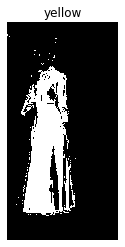

In [20]:
dest = yellow.copy()

for r in range(yellow.shape[0]):
    for c in range(yellow.shape[1]): 
        if h[r,c] >= 10 and h[r,c] <= 50 and s[r,c] >=170 and s[r,c] <=230:# 노란색 부분만
            dest[r,c,:] = [255,255,255]  # 흰색으로
        else:
            dest[r,c,:] = [0,0,0]
            
imshow('yellow', dest)

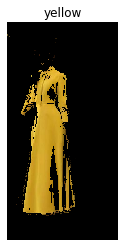

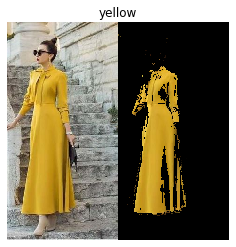

In [21]:
dest = yellow.copy()

for r in range(yellow.shape[0]):
    for c in range(yellow.shape[1]): 
        if h[r,c] >= 10 and h[r,c] <= 50 and s[r,c] >=170 and s[r,c] <=230:# 노란색 부분만
            dest[r,c,:] = yellow[r,c,:] 
        else:
            dest[r,c,:] = [0,0,0]
            
imshow('yellow', dest)

dest2 = np.hstack((yellow, dest))
imshow('yellow', dest2)

## 크로마키 합성

In [22]:
fire = cv2.imread(DIR+'test.jpg')
hsv = cv2.cvtColor(fire, cv2.COLOR_BGR2HSV)
patch = hsv[0:20, 0:20, :] # 크로마키 영역

minH = np.min(patch[:,:,0])*0.9
maxH = np.max(patch[:,:,0])*1.1

minS = np.min(patch[:,:,1])*0.9
maxS = np.max(patch[:,:,1])*1.1

In [23]:
np.min(patch[:,:,1])

255

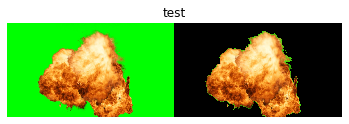

In [24]:
h = hsv[:,:,0]
s = hsv[:,:,1]

dest = fire.copy()

for r in range(fire.shape[0]):
    for c in range(fire.shape[1]):
        if h[r,c] >= minH and h[r,c] <= maxH and s[r,c] >= minS and s[r,c] <= maxS:
            dest[r,c,:] = [0,0,0]
        else:
            dest[r,c,:] = fire[r,c,:]

dest2 = np.hstack((fire, dest))
imshow('test', dest2)

In [25]:
cap = cv2.VideoCapture(DIR+'stopwatch.avi')

for i in range(25*6):
    ret, frame = cap.read()
    cv2.imshow('frame', frame)
    if cv2.waitKey(30)==27:
        break
        
cv2.destroyAllWindows()
    

In [26]:
def chromakey(img, background):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    patch = hsv[0:20, 0:20, :] 

    minH = np.min(patch[:,:,0])*0.9
    maxH = np.max(patch[:,:,0])*1.1

    minS = np.min(patch[:,:,1])*0.9
    maxS = np.max(patch[:,:,1])*1.1

    h = hsv[:,:,0]
    s = hsv[:,:,1]

    dest = img.copy()

    for r in range(img.shape[0]):
        for c in range(img.shape[1]):
            if h[r,c] >= minH and h[r,c] <= maxH and s[r,c] >= minS and s[r,c] <= maxS:
                dest[r,c,:] = background[r,c,:]
            else:
                dest[r,c,:] = img[r,c,:]
                
    return dest

In [27]:
fire_cap = cv2.VideoCapture(DIR+'explosion.mp4')
bg = cv2.imread(DIR+'boo-bg.jpg')
bg = cv2.resize(bg, dsize=(320,240))

for i in range(25*6):
    ret, frame = fire_cap.read()
    frame = cv2.resize(frame, dsize=(320,240))
    
    dest = chromakey(frame,bg)
    
    dest = np.hstack((frame,dest))
    cv2.imshow('frame', dest)
    
    if cv2.waitKey(10)==27:
        break
        
cv2.destroyAllWindows()

## Flask

In [54]:
%%writefile server.py

import cv2
import numpy as np
import datetime
from flask import Flask, request

app = Flask(__name__)

def chromakey(img, background):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    patch = hsv[0:20, 0:20, :] 

    minH = np.min(patch[:,:,0])*0.9
    maxH = np.max(patch[:,:,0])*1.1

    minS = np.min(patch[:,:,1])*0.9
    maxS = np.max(patch[:,:,1])*1.1

    h = hsv[:,:,0]
    s = hsv[:,:,1]

    dest = img.copy()

    for r in range(img.shape[0]):
        for c in range(img.shape[1]):
            if h[r,c] >= minH and h[r,c] <= maxH and s[r,c] >= minS and s[r,c] <= maxS:
                dest[r,c,:] = background[r,c,:]
            else:
                dest[r,c,:] = img[r,c,:]
                
    return dest

@app.route('/')
def index():
    html = """
        <form action=/upload method=post enctype='multipart/form-data'>
            <input type=file name=file1> <input type=submit value='전송'>
         <select name=backimg>
             <option value=bg1.jpg>대나무</option>
             <option value=bg2.jpg>상가</option>
             <option value=bg3.jpg>TV</option>
         </select>
         <img src=/static/bg1.jpg width=100>
         <img src=/static/bg2.jpg width=100>
         <img src=/static/bg3.jpg width=100>
        </form>
    
    """
    return html

@app.route('/upload', methods=["post"])
def upload():
    f = request.files['file1']
    filename = "./static/" + f.filename
    f.save(filename)
    
    backimg = request.form.get("backimg")
    
    img = cv2.imread(filename)
    img = cv2.resize(img, dsize=(320,240))
    
    bg = cv2.imread('./static/' + backimg)
    bg = cv2.resize(bg, dsize=(320,240))
    
    img = chromakey(img, bg)
    cv2.imwrite(filename, img)
    
    return "<img src=/static/" + f.filename + "?"+ datetime.datetime.now().strftime('%H%M%S') + ">"

if __name__ == '__main__':
    app.run(host='0.0.0.0', debug=True, port=8000)

Overwriting server.py
